Python Notebook for visualizing all figures in the Phyllochron manuscript drawn in Matplotlib

In [1]:
import numpy as np

import scipy.stats
from scipy.stats import betabinom

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
plt.style.use("../plotting/paper.mplstyle")

mpl.rcParams['figure.dpi'] = 300

# Example Inputs for Simulation Study

In [34]:
num_timepoints = 5
error_rate = 0.075
num_cells_per_sample = 2000
read_depth = 30
nmutations = 5
clone_matrix = np.array([[0,0,0,0,0],
                         [0,0,0,0,1],
                         [0,0,0,1,1],
                         [0,0,1,0,1],
                         [0,1,1,0,1],
                         [1,0,1,0,1],])


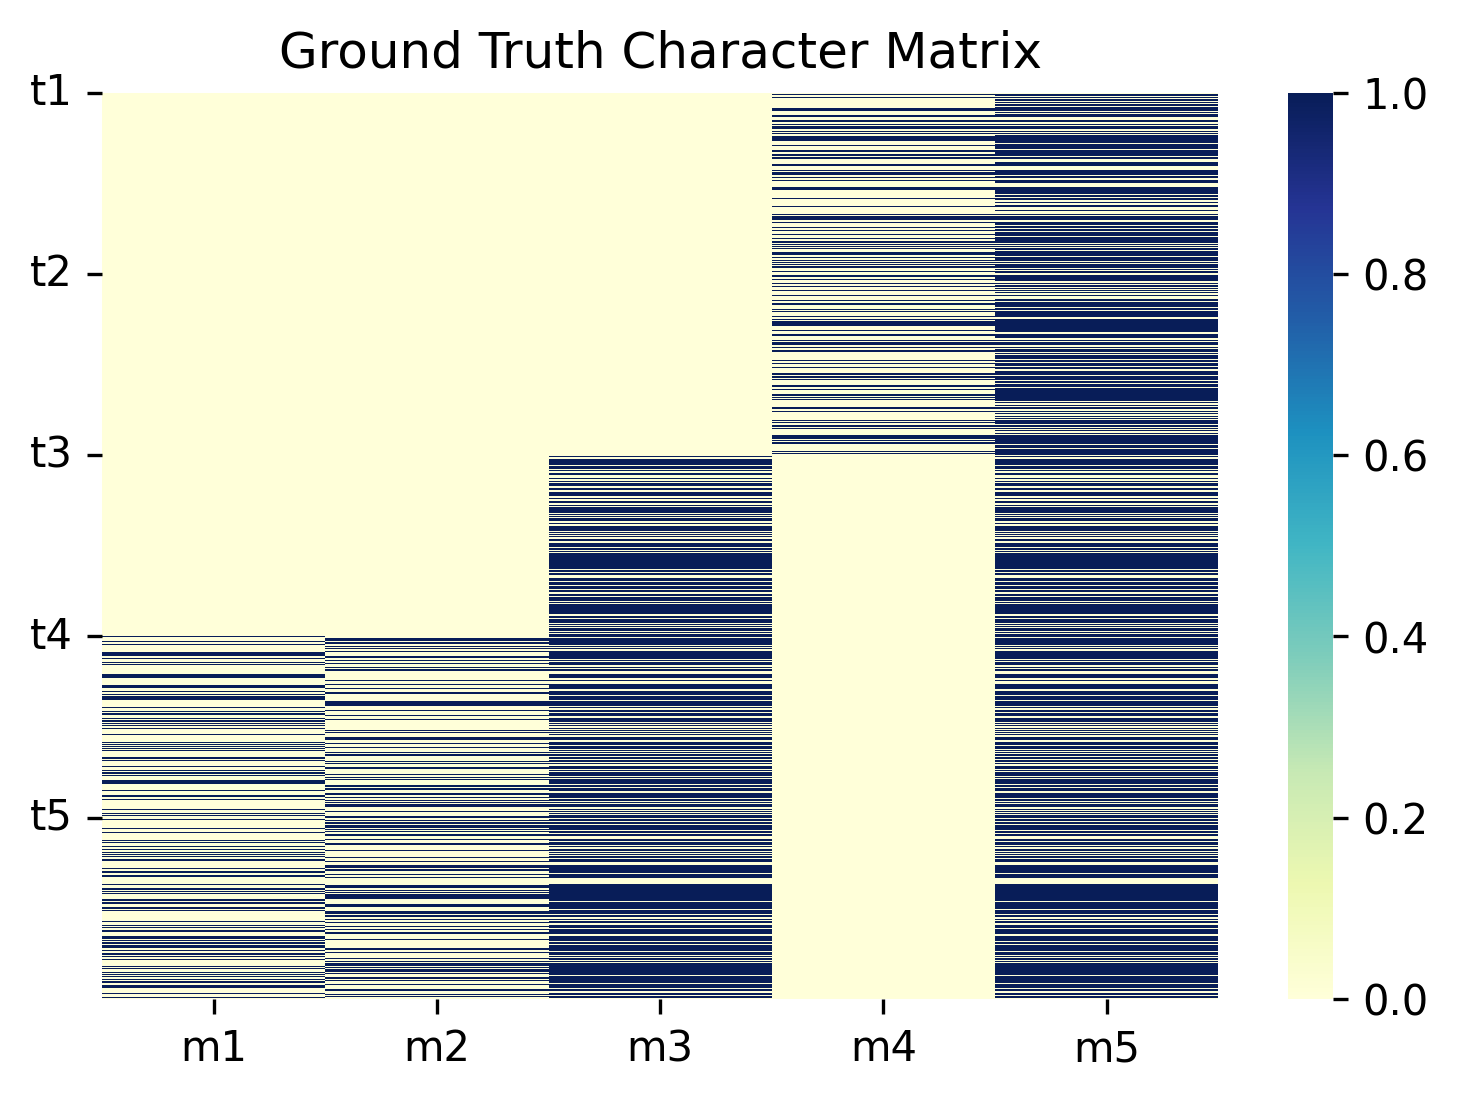

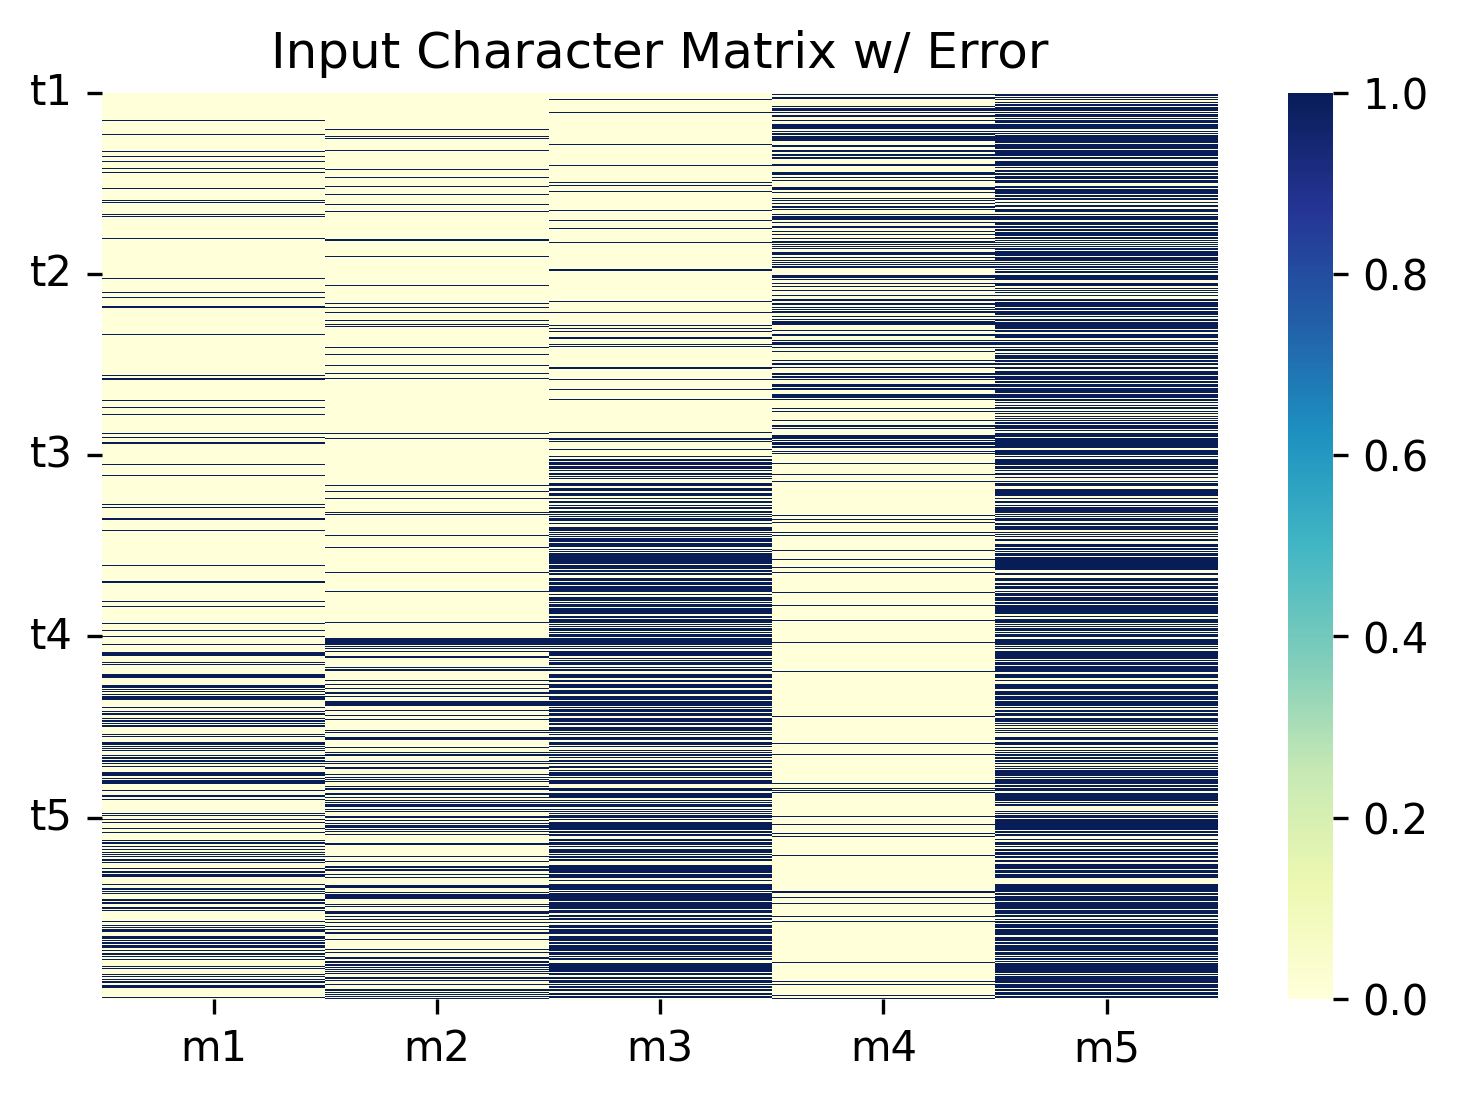

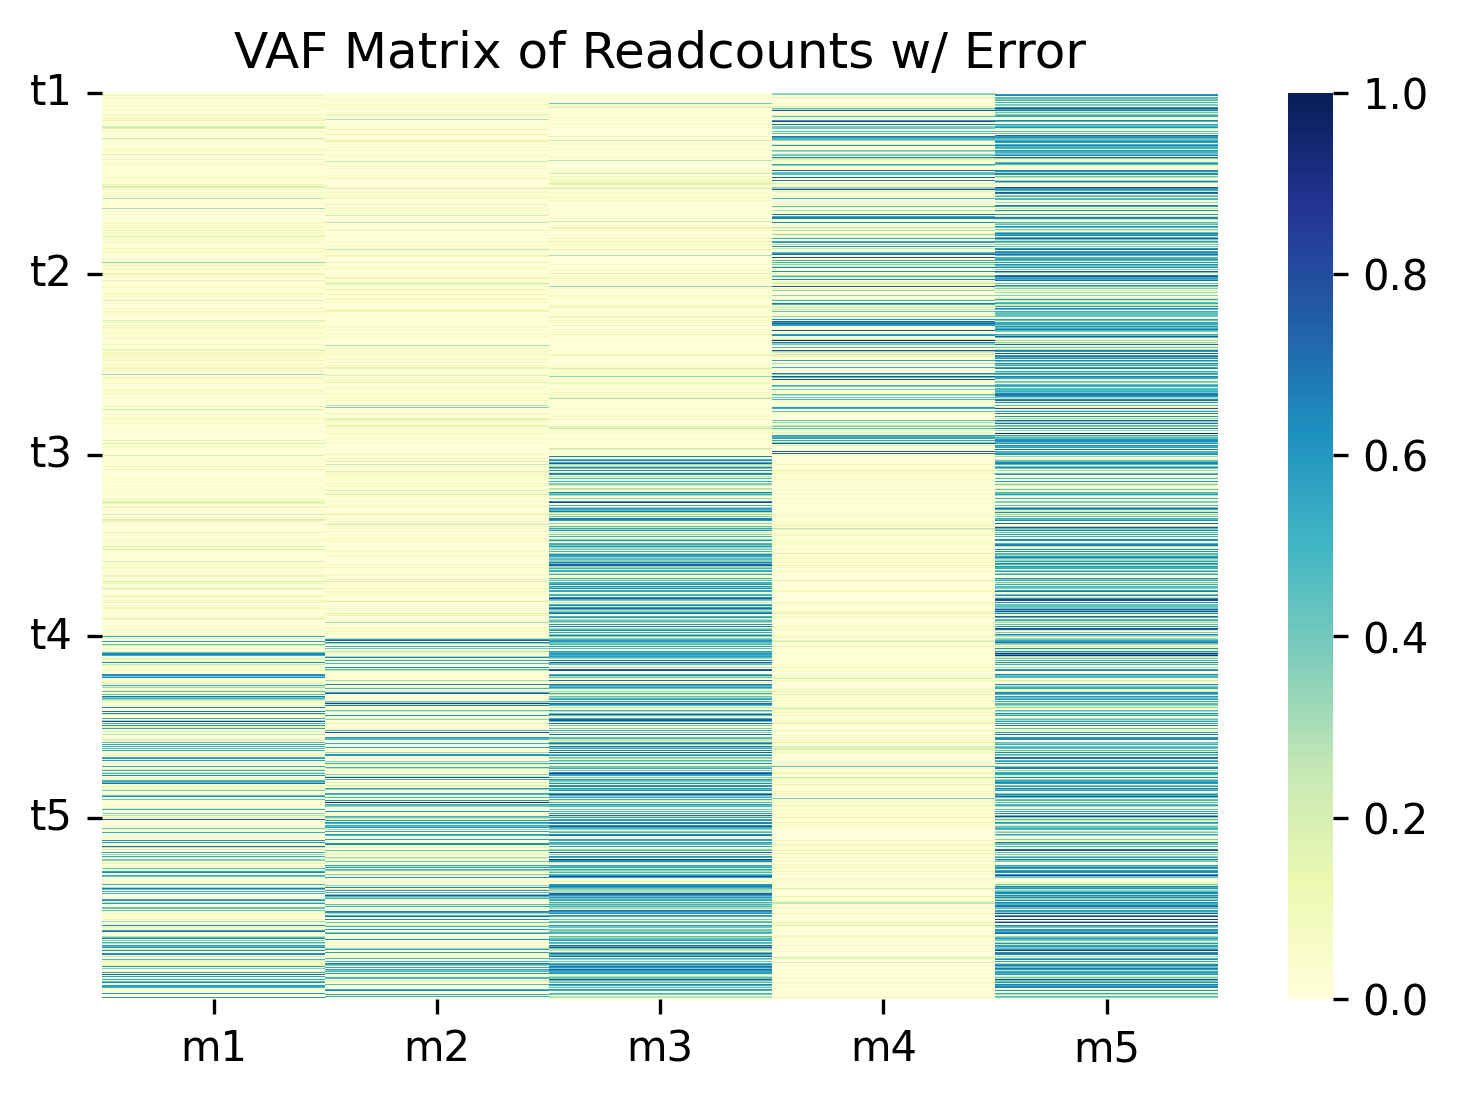

In [35]:
for t in [num_timepoints]:
    for prop in [error_rate]:
            character_matrix = np.zeros((t * num_cells_per_sample, nmutations))

            for tp in range(t):
                for i in range(num_cells_per_sample):
                    if tp < t//2:
                        j = np.random.randint(3)
                        character_matrix[tp * num_cells_per_sample + i] = clone_matrix[j]
                    if tp == t//2:
                        j = np.random.randint(3)
                        if j == 0:
                            character_matrix[tp * num_cells_per_sample + i] = clone_matrix[0]
                        else:
                            character_matrix[tp * num_cells_per_sample + i] = clone_matrix[3]

                    if tp >= t//2 + 1:
                        j = np.random.randint(4,7)
                        if j > 5:
                            character_matrix[tp * num_cells_per_sample + i] = clone_matrix[0]
                        else:
                            character_matrix[tp * num_cells_per_sample + i] = clone_matrix[j]

            og_character_matrix = character_matrix.copy()
            
            
            total_rc_matrix = character_matrix.copy()
            variant_rc_matrix = character_matrix.copy()

            for r in range(og_character_matrix.shape[0]):
                for c in range(og_character_matrix.shape[1]):
                    total_rc_matrix[r,c] = int(np.random.poisson(read_depth))
                    fp_error_rate = error_rate/2 + (1 - error_rate) * 0.50 * og_character_matrix[r,c]
                    alpha = fp_error_rate * 15
                    beta = (1-fp_error_rate) * 15
                    variant_rc_matrix[r,c] = int(scipy.stats.betabinom.rvs(int(total_rc_matrix[r,c]), alpha, beta))
            
            
            
            df_total = pd.DataFrame(data=variant_rc_matrix/total_rc_matrix, index=list(range(t * num_cells_per_sample)), columns=['m1', 'm2', 'm3', 'm4', 'm5'])

            # Determine number of elements to flip (10% of total elements)
            num_to_flip = int(prop * character_matrix.size)

            # Randomly select indices to flip
            indices_to_flip = np.random.choice(character_matrix.size, size=num_to_flip, replace=False)

            # Toggle (flip) the values at selected indices
            binary_array_flat = character_matrix.flatten()
            binary_array_flat[indices_to_flip] = 1 - binary_array_flat[indices_to_flip]
            character_matrix = binary_array_flat.reshape(character_matrix.shape)

            
            df_orig = pd.DataFrame(data=og_character_matrix, index=list(range(t * num_cells_per_sample)), columns=['m1', 'm2', 'm3', 'm4', 'm5'])
            df = pd.DataFrame(data=character_matrix, index=list(range(t * num_cells_per_sample)), columns=['m1', 'm2', 'm3', 'm4', 'm5'])
            plt.figure()
            plt.title('Ground Truth Character Matrix')
            heatmap = sns.heatmap(df_orig, vmin=0, vmax=1, cmap=sns.color_palette("YlGnBu", as_cmap=True))
            yticks = np.arange(0, len(df_orig.index), num_cells_per_sample)
            yticklabels = [f't{i}' for i in np.arange(1, nmutations + 1)]
            heatmap.set_yticks(yticks)
            heatmap.set_yticklabels(yticklabels)
            plt.show()
            plt.figure()
            plt.title('Input Character Matrix w/ Error')
            heatmap = sns.heatmap(df, vmin=0, vmax=1, cmap=sns.color_palette("YlGnBu", as_cmap=True))
            yticks = np.arange(0, len(df.index), num_cells_per_sample)
            yticklabels = [f't{i}' for i in np.arange(1, nmutations + 1)]
            heatmap.set_yticks(yticks)
            heatmap.set_yticklabels(yticklabels)
            plt.show()
            plt.figure()
            plt.title('VAF Matrix of Readcounts w/ Error')
            heatmap = sns.heatmap(df_total, vmin=0, vmax=1, cmap=sns.color_palette("YlGnBu", as_cmap=True))
            yticks = np.arange(0, len(df_total.index), num_cells_per_sample)
            yticklabels = [f't{i}' for i in np.arange(1, nmutations + 1)]
            heatmap.set_yticks(yticks)
            heatmap.set_yticklabels(yticklabels)
            plt.show()

## Example Beta-Binomial Distribution Modelling Readcount Error

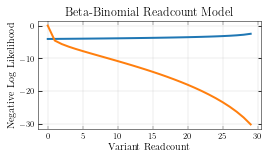

In [67]:
n_reads = 30
x = np.arange(0, n_reads)

ado_precision = 15
fp = 0.001


alpha1, beta1 = 1, 0.5
y1 = n_reads
logpmf1 = betabinom.logpmf(x, n=y1, a=alpha1, b=beta1)

alpha2, beta2 = fp * ado_precision, (1-fp)*ado_precision
y2 = n_reads
logpmf2 = betabinom.logpmf(x, n=y2, a=alpha2, b=beta2)

plt.figure(figsize=(4,2))
plt.plot(x, logpmf1)
plt.plot(x, logpmf2)
plt.xlabel('Variant Readcount')
plt.ylabel('Negative Log Likelihood')
#plt.xlim(0,14)
#plt.ylim(0,12)
plt.title('Beta-Binomial Readcount Model')

plt.grid(True)
plt.show()